# Decision Tree: Iris dataset

We have to create a decision tree classifier model to classify flowers to one of the three given possible classes.

In [1]:
pip install pydotplus


[notice] A new release of pip is available: 24.1.2 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

import warnings
warnings.filterwarnings("ignore")

### Import IRIS dataset

In [4]:
iris = pd.read_csv('iris_csv.csv')
iris

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
classes = iris['class'].unique().tolist()
classes

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Model Building and evaluation

In [7]:
x = iris.drop('class', axis=1)
y = iris['class']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=99)

In [9]:
x_train.head()

,sepallength,sepalwidth,petallength,petalwidth
10,5.4,3.7,1.5,0.2
25,5.0,3.0,1.6,0.2
13,4.3,3.0,1.1,0.1
131,7.9,3.8,6.4,2.0
65,6.7,3.1,4.4,1.4


In [10]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

#### Making predictions on train data

In [11]:
y_pred_train = model.predict(x_train)
print(classification_report(y_train, y_pred_train))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       1.00      1.00      1.00        32
 Iris-virginica       1.00      1.00      1.00        35

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105



In [12]:
print(confusion_matrix(y_train, y_pred_train))

[[38  0  0]
 [ 0 32  0]
 [ 0  0 35]]


### Make predictions on test data

In [13]:
y_pred_test = model.predict(x_test)
print(classification_report(y_test, y_pred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [14]:
print(confusion_matrix(y_test, y_pred_test))

[[12  0  0]
 [ 0 17  1]
 [ 0  1 14]]


### Plotting the decision tree

In [15]:
from sklearn import tree

model1 = tree.DecisionTreeClassifier()

model1.fit(x_train, y_train)

DecisionTreeClassifier()

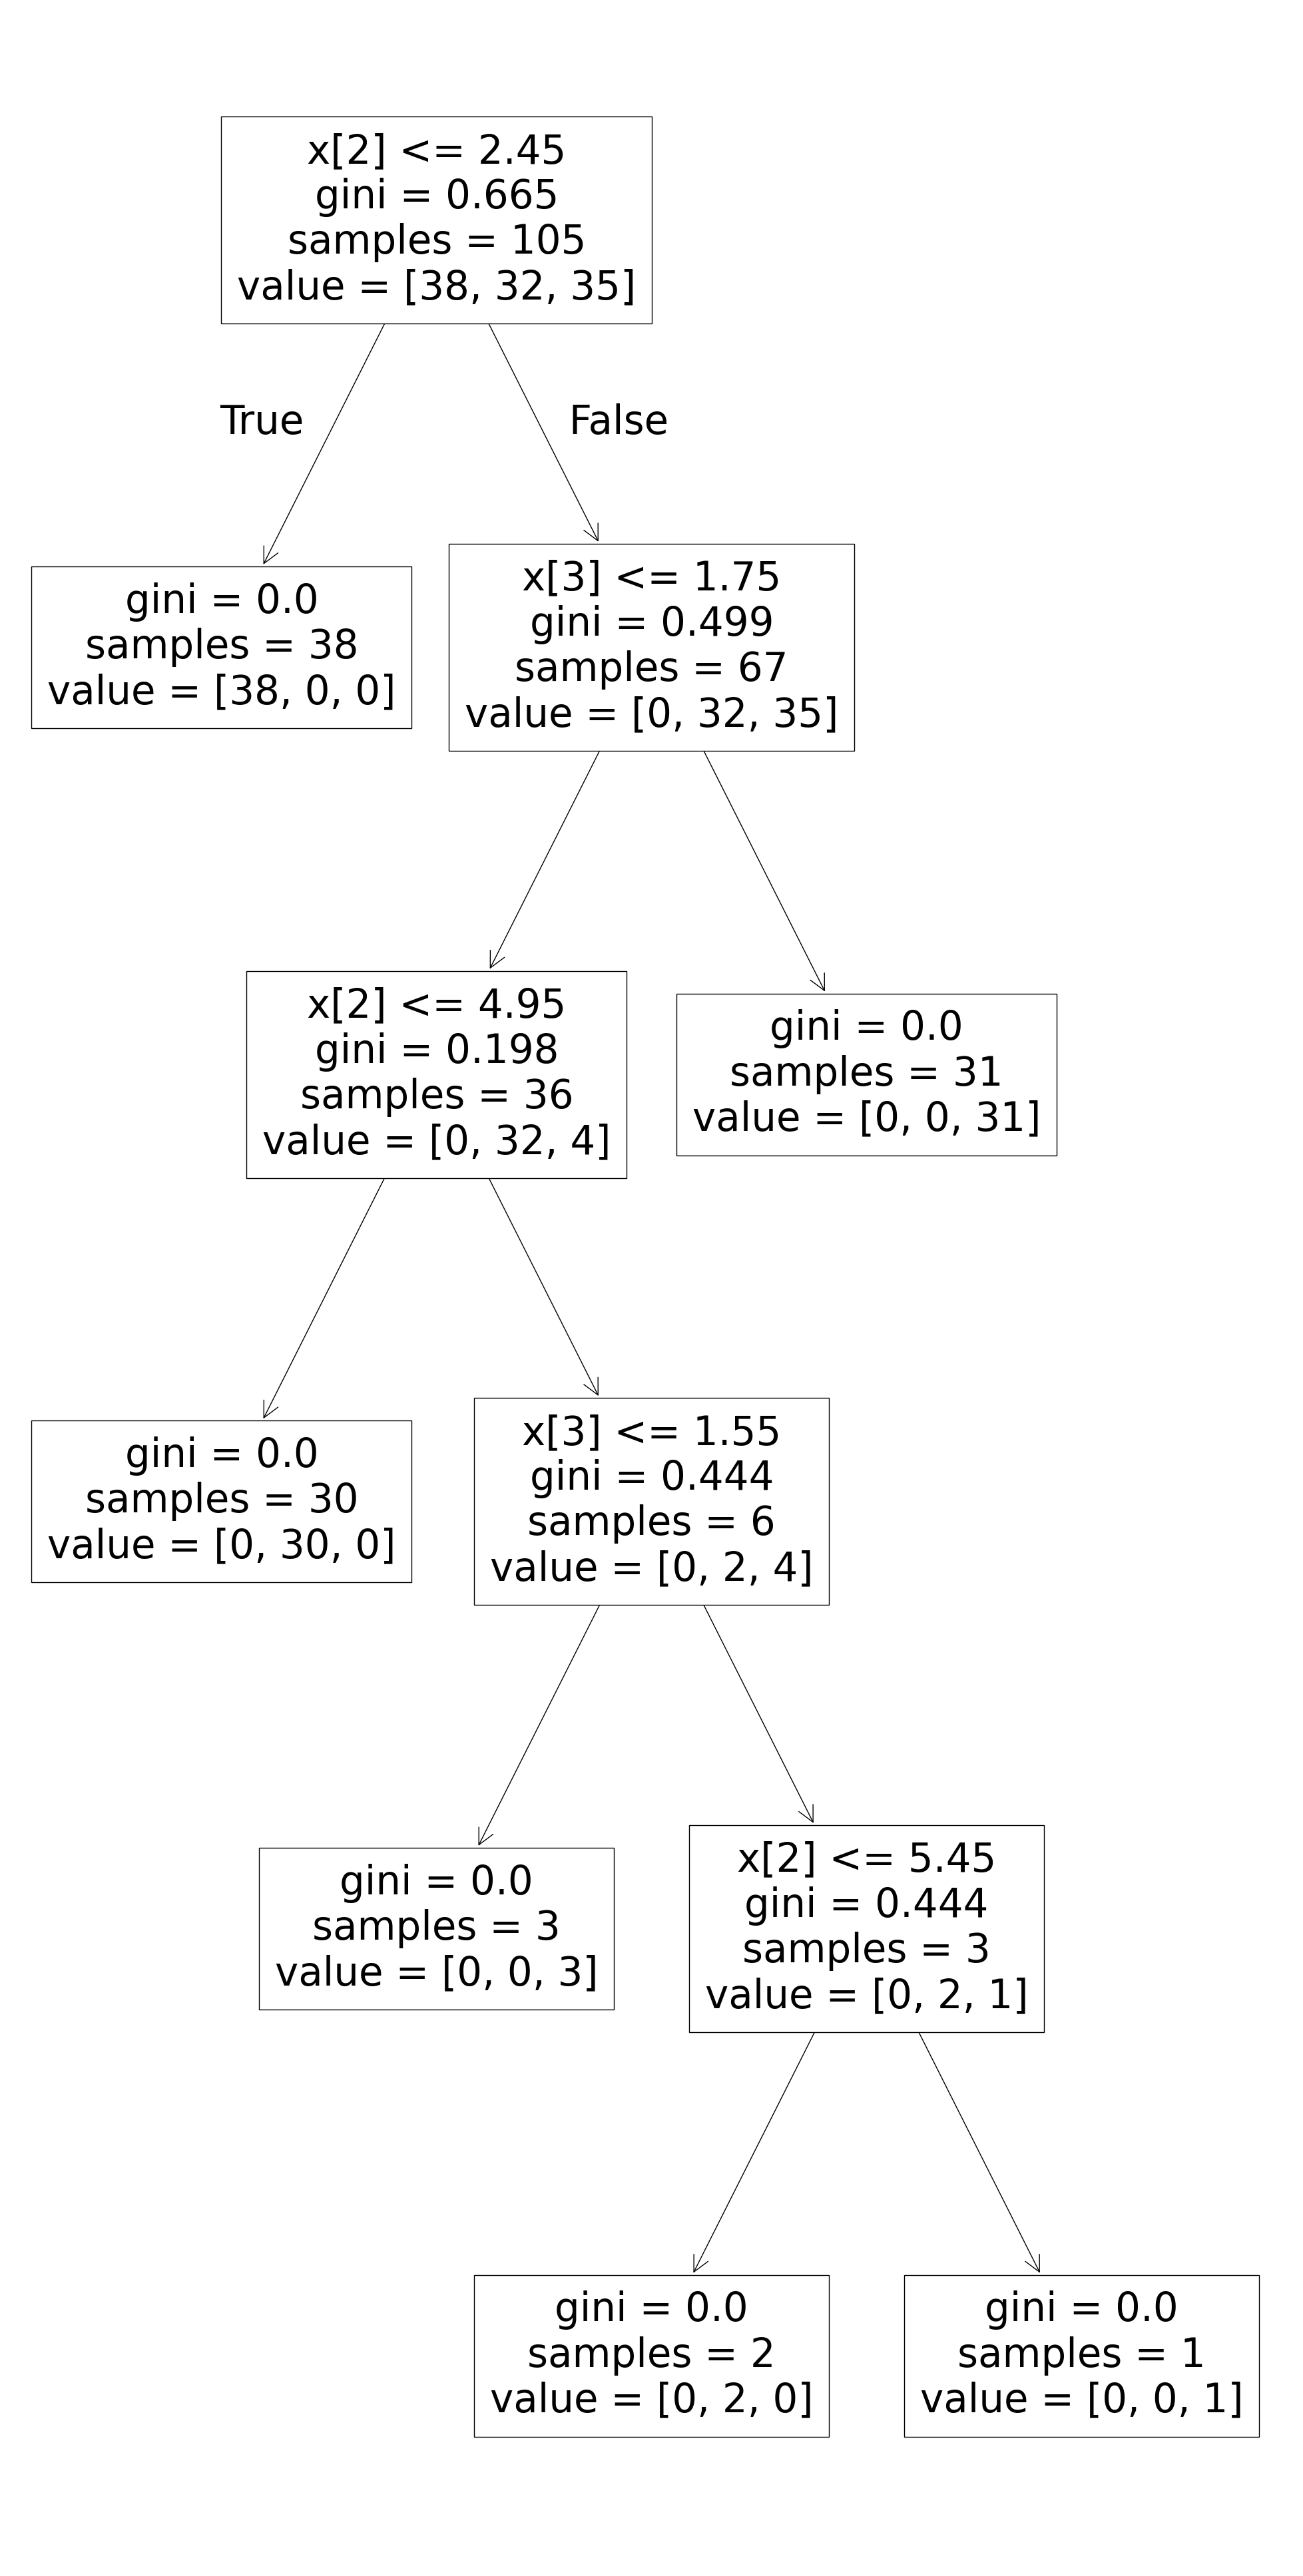

In [16]:
# plt1 = tree.plot_tree(model1)
plt.figure(figsize=(25,50))
plt1 = tree.plot_tree(model1)

## Hyperparameter Tuning

In [17]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strat

### Optimise hyperparameters using GridSearchCV and K-Fold Cross Validation

#### Find optimum max_depth

In [18]:
# Using GridSearchCV to find the optimum max_depth

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'max_depth': range(1, 10)}

dtree = DecisionTreeClassifier(criterion='gini', random_state=100)

tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring='accuracy', return_train_score=True)
tree.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [20]:
scores = tree.cv_results_
pd.DataFrame(scores).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004847,0.001679,0.003897,0.002196,1,{'max_depth': 1},0.714286,0.714286,0.714286,0.666667,...,0.695238,0.023328,9,0.690476,0.690476,0.690476,0.702381,0.702381,0.695238,0.005832
1,0.002701,0.000245,0.002034,0.000297,2,{'max_depth': 2},0.952381,1.000000,0.857143,0.952381,...,0.942857,0.046657,7,0.964286,0.952381,0.988095,0.964286,0.964286,0.966667,0.011664
2,0.002729,0.000241,0.002084,0.000187,3,{'max_depth': 3},0.952381,1.000000,0.809524,0.952381,...,0.942857,0.069985,7,0.964286,0.976190,0.988095,0.988095,0.976190,0.978571,0.008909
3,0.002220,0.000105,0.001765,0.000163,4,{'max_depth': 4},1.000000,1.000000,0.857143,0.952381,...,0.952381,0.052164,6,0.976190,0.988095,1.000000,0.988095,1.000000,0.990476,0.008909
4,0.003075,0.000957,0.002527,0.000659,5,{'max_depth': 5},1.000000,1.000000,0.857143,1.000000,...,0.961905,0.055533,1,0.988095,1.000000,1.000000,1.000000,1.000000,0.997619,0.004762
5,0.002924,0.000418,0.002208,0.000244,6,{'max_depth': 6},1.000000,1.000000,0.857143,1.000000,...,0.961905,0.055533,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.002175,0.000111,0.001623,0.000035,7,{'max_depth': 7},1.000000,1.000000,0.857143,1.000000,...,0.961905,0.055533,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.002069,0.000101,0.001594,0.000077,8,{'max_depth': 8},1.000000,1.000000,0.857143,1.000000,...,0.961905,0.055533,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.002240,0.000128,0.001711,0.000235,9,{'max_depth': 9},1.000000,1.000000,0.857143,1.000000,...,0.961905,0.055533,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


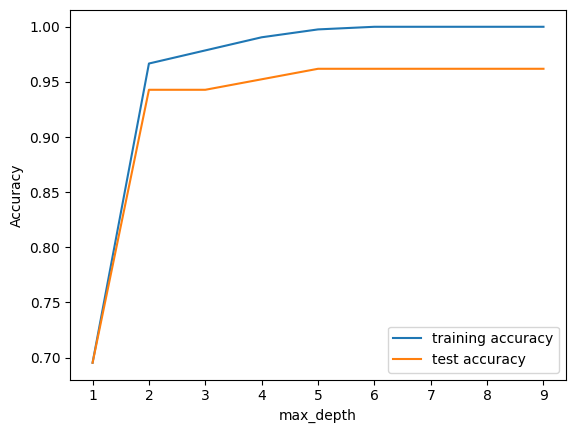

In [22]:
plt.figure()

plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test accuracy")

plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning min_samples_leaf

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds=5

parameters = {'min_samples_leaf': range(1, 40, 3)}

dtree = DecisionTreeClassifier(criterion='gini', random_state=100)
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring='accuracy', return_train_score=True)

tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(1, 40, 3)},
             return_train_score=True, scoring='accuracy')

In [26]:
scores = tree.cv_results_
pd.DataFrame(scores).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005331,0.002268,0.004050,0.000572,1,{'min_samples_leaf': 1},1.000000,1.000000,0.857143,1.000000,...,0.961905,0.055533,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.004713,0.001196,0.003691,0.001350,4,{'min_samples_leaf': 4},0.952381,1.000000,0.857143,1.000000,...,0.961905,0.055533,1,0.964286,0.976190,0.988095,0.976190,0.976190,0.976190,0.007529
2,0.002628,0.000304,0.002000,0.000198,7,{'min_samples_leaf': 7},0.952381,1.000000,0.857143,0.952381,...,0.942857,0.046657,3,0.964286,0.964286,0.988095,0.964286,0.964286,0.969048,0.009524
3,0.002301,0.000194,0.001848,0.000205,10,{'min_samples_leaf': 10},0.952381,1.000000,0.857143,0.952381,...,0.942857,0.046657,3,0.964286,0.952381,0.988095,0.964286,0.964286,0.966667,0.011664
4,0.002363,0.000118,0.001660,0.000101,13,{'min_samples_leaf': 13},0.952381,1.000000,0.857143,0.952381,...,0.942857,0.046657,3,0.964286,0.952381,0.988095,0.964286,0.964286,0.966667,0.011664
5,0.002635,0.000154,0.002068,0.000123,16,{'min_samples_leaf': 16},0.952381,1.000000,0.857143,0.952381,...,0.942857,0.046657,3,0.964286,0.952381,0.988095,0.964286,0.964286,0.966667,0.011664
6,0.002181,0.000157,0.001657,0.000149,19,{'min_samples_leaf': 19},0.952381,1.000000,0.857143,0.952381,...,0.942857,0.046657,3,0.964286,0.952381,0.988095,0.964286,0.964286,0.966667,0.011664
7,0.002195,0.000165,0.001725,0.000182,22,{'min_samples_leaf': 22},0.952381,1.000000,0.857143,0.952381,...,0.942857,0.046657,3,0.964286,0.952381,0.988095,0.964286,0.964286,0.966667,0.011664
8,0.002167,0.000186,0.001655,0.000133,25,{'min_samples_leaf': 25},0.952381,1.000000,0.857143,0.952381,...,0.942857,0.046657,3,0.964286,0.940476,0.988095,0.964286,0.964286,0.964286,0.015058
9,0.002383,0.000193,0.001819,0.000316,28,{'min_samples_leaf': 28},0.714286,0.714286,0.714286,0.666667,...,0.695238,0.023328,10,0.690476,0.690476,0.690476,0.702381,0.702381,0.695238,0.005832


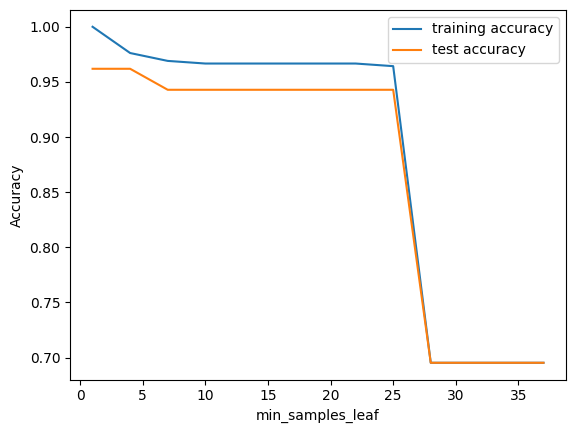

In [27]:
plt.figure()

plt.plot(scores["param_min_samples_leaf"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], scores["mean_test_score"], label="test accuracy")

plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to find the optimum hyperparameters

In [28]:
param_grid = {
    'max_depth': range(1,10),
    'min_samples_leaf': range(1, 40, 2),
    'min_samples_split': range(2, 30, 2),
    'criterion': ['gini', 'entropy']
}

n_folds = 5

dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=n_folds, verbose=1)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 5040 candidates, totalling 25200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 40, 2),
                         'min_samples_split': range(2, 30, 2)},
             verbose=1)

In [32]:
print("best accuracy:", grid_search.best_score_)
print("best estimator:", grid_search.best_estimator_)
print("criterion:", grid_search.best_estimator_.criterion)

best accuracy: 0.9714285714285715
best estimator: DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)
criterion: gini


In [37]:
# running the model with the best parameters

tree1 = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=100, min_samples_leaf=3, min_samples_split=2)
tree1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=100)

In [38]:
tree1.score(x_test, y_test)

0.9555555555555556

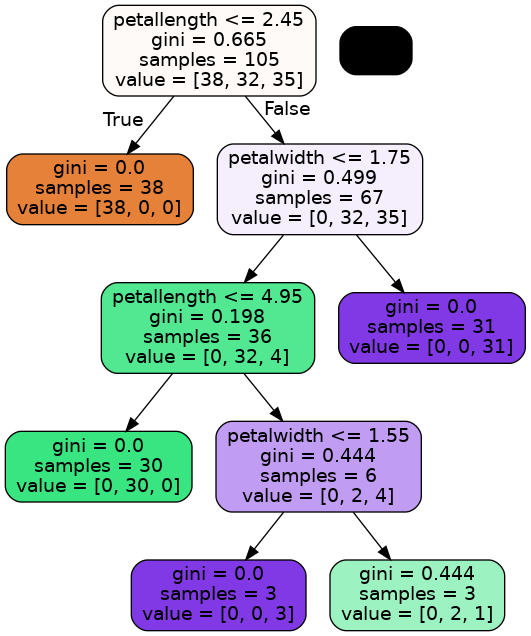

In [39]:
# plotting the tree
features = list(x_train.columns)

dot_data = StringIO()  
export_graphviz(tree1, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [40]:
y_pred_test1 = tree1.predict(x_test)
print(classification_report(y_test, y_pred_test1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

